In [2]:
import pandas as pd
import numpy as np
from datascience import *
from datascience import Table
import matplotlib

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# Project 1: Covid-19 and Exponential Growth

## Table of Contents
<a href='#section 0'>Background Knowledge: Spread of Disease</a>

1.  <a href='#section 1'> The Data Science Life Cycle</a>

    a. <a href='#subsection 1a'>Formulating a question or problem</a> 

    b. <a href='#subsection 1b'>Acquiring and cleaning data</a>

    c. <a href='#subsection 1c'>Conducting exploratory data analysis</a>

    d. <a href='#subsection 1d'>Using prediction and inference to draw conclusions</a>
<br><br>

### Background Knowledge <a id='section 0'></a>


Exponential growth video: https://www.youtube.com/watch?v=MHRQ1UGKRyI&feature=youtu.be

Exponential growth describes a quantity that's changing by some constant factor for every unit of time. For example, a value that is doubling every month is exponential growth. Let's look at this will a rumor. If you hear a rumor and only tell 1 other person each day, then only 11 people will know after 10 days. Now, telling 2 new people may not seem like that much of a difference, but it will end up reaching 1024 people in those 10 day instead of 11. This is exponential growth.
<img src="images/rumor_img.png" width = 500/>

For diseases, different infections spread through populations at different rates. The "basic reproductive number", or R0, is the number of people each infected person is expected to infect if no one has been vaccinated.
<img src="images/linear_v_exp.png" width = 500/>


<img src="images/r0.png" width = 700/>

#### Practice questions

1. If a disease has an R0 of 4, and 100 people come into contact with an infected individual on average, what is the probability that any one friend becomes infected? Hint: look at the middle diagram above.

*Insert your answer here, replacing this text.*

2. How many of the 100 friends would need to be vaccinated to bring the R0 down to 1? (a linear rate instead of an exponential rate)

*Insert your answer here, replacing this text.*

# The Data Science Life Cycle <a id='section 1'></a>

## Formulating a question or problem <a id='subsection 1a'></a>
It is important to ask questions that will be informative and that will avoid misleading results. There are many different questions we could ask about Covid-19, for example, many researchers use data to predict the outcomes based on intervention techniques such as social distancing. https://www.washingtonpost.com/graphics/2020/world/corona-simulator/ 

<div class="alert alert-warning">
<b>Question:</b> Take some time to formulate questions you have about this pandemic and the data you would need to answer the question.
    
   </div>


Your questions: *here*


Data you would need: *here*

## Acquiring and cleaning data <a id='subsection 1b'></a>

We'll be looking at the COVID-19 Data Repository from Johns Hopkins University. You can find the raw data [here](https://github.com/CSSEGISandData/COVID-19). We've cleaned up the datasets a bit, but we will be investigating the number of confirmed cases and the number of new cases in the United States from March to June.

The following table, `confirmed_cases`, contains the number of confirmed cases at the start of each month for every county in the United States.

In [3]:
confirmed_cases = Table().read_table("data/covid_by_county.csv")
confirmed_cases.show(10)

County,State,Combined_Key,3/1/2020,4/1/2020,5/1/2020,6/1/2020
nan,American Samoa,"American Samoa, US",0,0,0,0
nan,Guam,"Guam, US",0,77,145,175
nan,Northern Mariana Islands,"Northern Mariana Islands, US",0,6,14,22
nan,Puerto Rico,"Puerto Rico, US",0,286,1575,3873
nan,Virgin Islands,"Virgin Islands, US",0,30,66,70
Autauga,Alabama,"Autauga, Alabama, US",0,8,42,233
Baldwin,Alabama,"Baldwin, Alabama, US",0,20,175,292
Barbour,Alabama,"Barbour, Alabama, US",0,0,42,172
Bibb,Alabama,"Bibb, Alabama, US",0,3,42,76
Blount,Alabama,"Blount, Alabama, US",0,5,39,63


<div class="alert alert-warning">
<b>Question:</b> Do you see any missing (nan) values? Why might they be there?
   </div>

*Insert answer here*

<div class="alert alert-warning">
<b>Question:</b> We want to learn more about the dataset. First, how many total rows are in this table? What does each row represent?
    
   </div>

In [6]:
total_rows = ...

*Insert answer here*

## Conducting exploratory data analysis <a id='subsection 1c'></a>

Visualizations help us to understand what the dataset is telling us. Compare the county with the most confirmed cases on April 1st with the next 9 most confirmed cases in a bar chart. 

<div class="alert alert-warning">
<b>Question:</b> First, sort the dataset to show the counties with the most cases at the top.
   </div>

In [ ]:
sorted_cases = ...

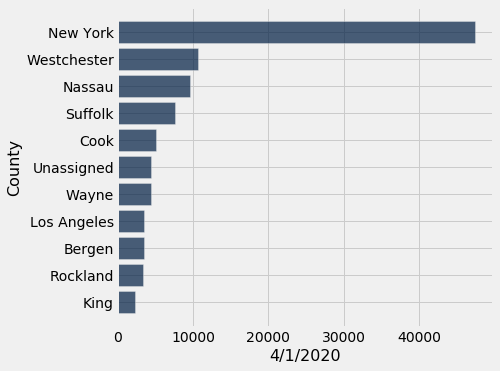

In [4]:
#KEY
confirmed_cases = confirmed_cases.sort("4/1/2020", descending = True).take(np.arange(10))
confirmed_cases.barh("County", "4/1/2020")

<div class="alert alert-warning">
<b>Question:</b> Now, cut down the table to only have the top ten from *sorted_cases* above.
   </div>

In [ ]:
top_ten = ...

<div class="alert alert-warning">
<b>Question:</b> Now, cut down the table to only have the top ten from *sorted_cases* above.
   </div>

## Using prediction and inference to draw conclusions <a id='subsection 1a'></a>

Source: How Math (and Vaccines) Keep You Safe From the Flu by Patrick Honner (Quanta Magazine)